# Survivants du Titanic

## Biliothèques

Voici l'ensemble des "Libraries" utilisées dans ce Notebook

In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
from keras.optimizers import SGD

## Données



In [220]:
# Import the data
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")  #echantillon test pour soumettre à Kaggle
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv") #echantillon d'apprentissage
traint = pd.concat([train,test]) #concaténation des 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
traint

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


brève information sur chaque colonne

* **PassengerId**  un index unique pour les lignes de passagers. Il commence à 1 pour la première ligne et augmente de 1 pour chaque nouvelle ligne.

* **Survived** indique si le passager a survécu ou non. 1 signifie survécu et 0 signifie non survécu.

* **Pclass** Classe de billet. 1 signifie billet de première classe. 2 signifie billet de deuxième classe. 3 signifie billet de troisième classe.

* **Nom** nom du passager. Le nom contient également le titre. "Mr" pour homme. "Mme" pour femme. "Miss" pour fille. "Maître" pour garçon.

* **Sexe** sexe du passager. C'est un homme ou une femme.

* **Âge** âge du passager. Les valeurs «NaN» dans cette colonne indiquent que l'âge de ce passager en particulier n'a pas été enregistré.

* **SibSp** nombre de frères et sœurs ou de conjoints voyageant avec chaque passager.

* **Parch** nombre de parents d'enfants voyageant avec chaque passager.

* **Ticket** numéro de ticket.

* **Tarif** combien d'argent le passager a payé pour le voyage.

* **Cabine** numéro de cabine du passager. Les valeurs «NaN» dans cette colonne indiquent que le numéro de cabine de ce passager en particulier n'a pas été enregistré.

* **Embarqué** port d'où le passager particulier a été embarqué / embarqué.

## Outils Pandas pour données manquantes 

### Informations sur le dataframe

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Décompte de NaN et un peu de statistique

In [224]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [225]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [226]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [227]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Combien du survivant ?

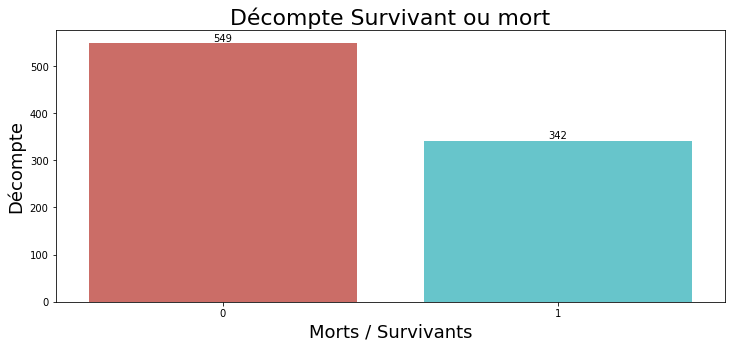

In [228]:
#
plt.figure(figsize=(12,5))

ax=sns.countplot(x="Survived", data=train,palette="hls")
plt.title('Décompte Survivant ou mort', fontsize=22)
plt.xlabel('Morts / Survivants', fontsize=18)
plt.ylabel('Décompte', fontsize=18)
Labels=train['Survived'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=Labels)
plt.show()

## Analyse des variables et données manquantes

### L'age 

#### Tracé Age en fonction du critère de survie

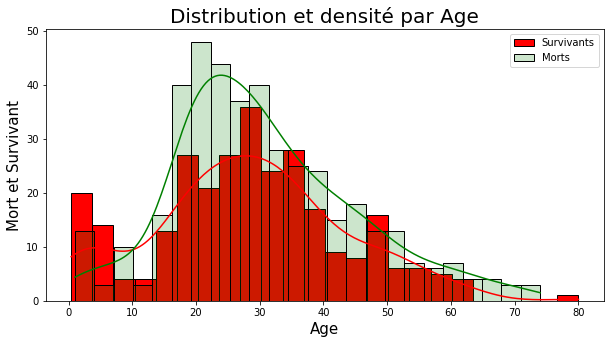

In [229]:
#
age_high_zero_died = train[(train["Age"] > 0) & 
                              (train["Survived"] == 0)]
age_high_zero_surv = train[(train["Age"] > 0) & 
                              (train["Survived"] == 1)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the two
sns.histplot(age_high_zero_surv["Age"], bins=24, color='r',kde=True,alpha = 1.0,label="Survivants")
sns.histplot(age_high_zero_died["Age"], bins=24, color='g',kde=True,alpha = 0.2,label="Morts")
plt.title("Distribution et densité par Age",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Mort et Survivant",fontsize=15)
plt.legend()
plt.show()

Adoptons une stratégie simple pour remplacer les données manquantes

In [230]:
print(traint["Age"].mean())
print(traint["Age"].median())

29.881137667304014
28.0


Chaque donnée manquante est remplacée par la moyenne des données.

In [231]:
rep=traint["Age"].median()
traint["Age"].replace(np.nan,rep,inplace=True) 

### Port d'embarquement

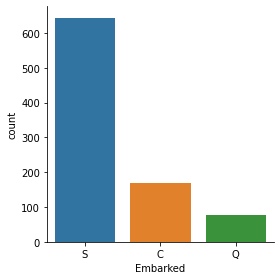

In [232]:
# Nombre de passager par port d'embarquement
plot = sns.catplot(x="Embarked",kind="count", data=train, height=4, aspect=1)

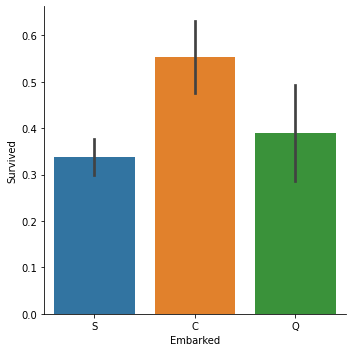

In [233]:
# Probabilité de survie suivant le port
plot = sns.catplot(x="Embarked", y='Survived', kind="bar", data=train, height=5, aspect=1)

On trouve le port le plus fréquent et on remplace (Il est possible aussi de respecter la proportionnalité de chaque port et de faire un tirage respectant cette répartition)

In [234]:
# Valeur la plus fréquent
freq_port =traint.Embarked.dropna().mode()[0]
freq_port 

'S'

In [235]:
traint['Embarked'].fillna(freq_port,inplace=True)

### Prix du voyage

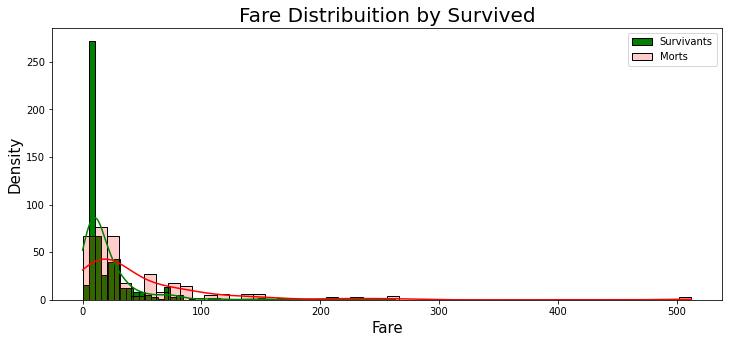

In [236]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.histplot(train[train.Survived == 0]["Fare"], 
             bins=50, color='g',kde=True,alpha = 1.0,label="Survivants")
sns.histplot(train[train.Survived == 1]["Fare"], 
             bins=50, color='r',kde=True,alpha = 0.2,label="Morts")
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.legend()
plt.show()

In [237]:
print(traint['Fare'].median())
print(traint['Fare'].mean())

14.4542
33.29547928134557


Valeur mediane...

In [238]:
traint['Fare'].fillna(traint['Fare'].dropna().median(), inplace=True)

### Et le numéro de cabine ?

In [239]:
traint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Beaucoup de données manquante il est envisageable de ne pas prendre en compte cette colone...

### La classe des passager

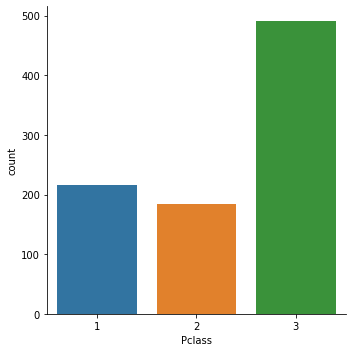

In [240]:
# Répartition par classe
plot = sns.catplot(x="Pclass", kind="count", data=train)

La Classe 3 est la plus représentée

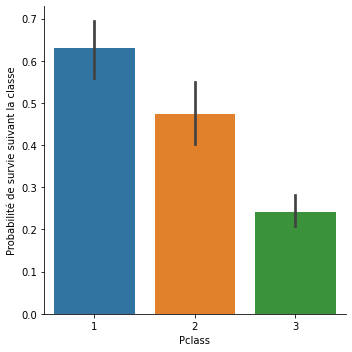

In [241]:
plot = sns.catplot(x="Pclass", y="Survived", kind="bar", data=train).set_ylabels("Probabilité de survie suivant la classe")

Mais en même temps celle qui a en proportion de chance de survie. La classe est une donnée importante !

### Le sexe

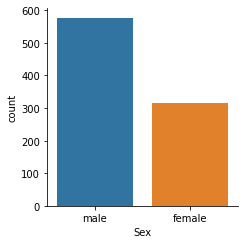

In [242]:
# Nombre homme femme
plot = sns.catplot(x="Sex", kind="count", data=train, height=3.5);

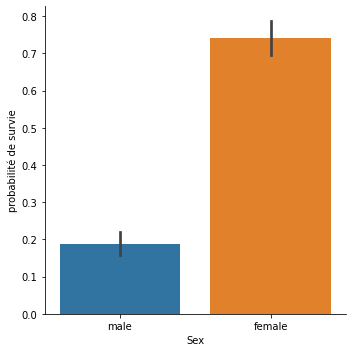

In [243]:
# plot Sexe / probabilité de survie
plot = sns.catplot(x="Sex", y="Survived", kind="bar", data=train).set_ylabels("probabilité de survie")

Voici une variable également importante combinons ces 2 variables

### Sexe et Classe

Effectifs

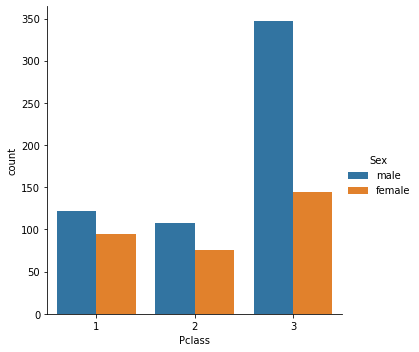

In [244]:
plot = sns.catplot(x="Pclass", hue="Sex", kind="count", data=train)

Distribution de probabillité

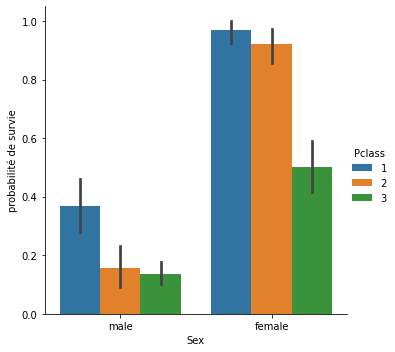

In [245]:
plot = sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train).set_ylabels("probabilité de survie")

### Le nom ?

In [246]:
train['Name'][240:280]

240                            Zabour, Miss. Thamine
241                   Murphy, Miss. Katherine "Kate"
242                  Coleridge, Mr. Reginald Charles
243                    Maenpaa, Mr. Matti Alexanteri
244                             Attalah, Mr. Sleiman
245                      Minahan, Dr. William Edward
246            Lindahl, Miss. Agda Thorilda Viktoria
247                  Hamalainen, Mrs. William (Anna)
248                    Beckwith, Mr. Richard Leonard
249                    Carter, Rev. Ernest Courtenay
250                           Reed, Mr. James George
251       Strom, Mrs. Wilhelm (Elna Matilda Persson)
252                        Stead, Mr. William Thomas
253                         Lobb, Mr. William Arthur
254         Rosblom, Mrs. Viktor (Helena Wilhelmina)
255          Touma, Mrs. Darwis (Hanne Youssef Razi)
256                   Thorne, Mrs. Gertrude Maybelle
257                             Cherry, Miss. Gladys
258                                 Ward, Miss

Les passager ont différents titre qui renseigne le sexe (Mr., Mrs., Miss., Master, Rev.), le statut social (Dr., Rev.) et aussi l'age (Mrs., Miss., Master, Dr., Rev.). Ce sont des caractéristiques importantes sur la chance de survie. On va ajouter une "Feature" Title. 

In [247]:
# Extraction des titre (finissent par ".")
for name_string in traint['Name']:
    traint['Title'] = traint['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Sinonymes
traint['Title']=traint['Title'].replace({'Ms':'Miss','Mlle':'Miss','Mme':'Mrs'})

traint['Title'].value_counts()

Mr          757
Miss        264
Mrs         198
Master       61
Rev           8
Dr            8
Col           4
Major         2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

L'analyse révèle quelques autres titres, dont certains sont des titres nobles ou indiquent un statut social plus élevé. Nous pouvons maintenant résumer les différents titres dans les catégories suivantes :

In [248]:
# Nobles
traint['Title']=traint['Title'].replace(['Sir','Don','Dona','Jonkheer','Lady','Countess'], 'Noble')

# Haut rang socail
traint['Title']=traint['Title'].replace(['Dr', 'Rev','Col','Major','Capt'], 'Others')

traint['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Others     23
Noble       6
Name: Title, dtype: int64

## Au final

Suprimons les variables non prise en compte

In [249]:
traint= traint.drop(["PassengerId","Name","Ticket","Cabin","Fare"],axis=1)
traint

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0.0,3,male,22.0,1,0,S,Mr
1,1.0,1,female,38.0,1,0,C,Mrs
2,1.0,3,female,26.0,0,0,S,Miss
3,1.0,1,female,35.0,1,0,S,Mrs
4,0.0,3,male,35.0,0,0,S,Mr
...,...,...,...,...,...,...,...,...
413,NaN,3,male,28.0,0,0,S,Mr
414,NaN,1,female,39.0,0,0,C,Noble
415,NaN,3,male,38.5,0,0,S,Mr
416,NaN,3,male,28.0,0,0,S,Mr


# Et ensuite

Il reste 2 étapes : 

* l'encodage des labels
* entrainement de différentes combinaisons de réseaux pour obtenir un meilleur score (accuracy par exemple)!

Enfin il ne reste plus qu'à soumettre sa prédiction sous kaggle.

## LabelEncode

Faisons le tour des différents Label

In [250]:
nom_col = traint.columns.values;print(nom_col)

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Embarked' 'Title']


In [251]:
for name in nom_col :
    print(name)
    print(traint[name].unique())

Survived
[ 0.  1. nan]
Pclass
[3 1 2]
Sex
['male' 'female']
Age
[22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5   0.33
  0.17 38.5 ]
SibSp
[1 0 3 4 2 5 8]
Parch
[0 1 2 5 3 4 6 9]
Embarked
['S' 'C' 'Q']
Title
['Mr' 'Mrs' 'Miss' 'Master' 'Noble' 'Others']


Seulement les colones suivantes nécessitent un encodage

In [253]:
for col in ['Sex','Embarked','Title']:
    traint[col]=pp.LabelEncoder().fit_transform(traint[col])
traint

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0.0,3,1,22.0,1,0,2,2
1,1.0,1,0,38.0,1,0,0,3
2,1.0,3,0,26.0,0,0,2,1
3,1.0,1,0,35.0,1,0,2,3
4,0.0,3,1,35.0,0,0,2,2
...,...,...,...,...,...,...,...,...
413,NaN,3,1,28.0,0,0,2,2
414,NaN,1,0,39.0,0,0,0,4
415,NaN,3,1,38.5,0,0,2,2
416,NaN,3,1,28.0,0,0,2,2


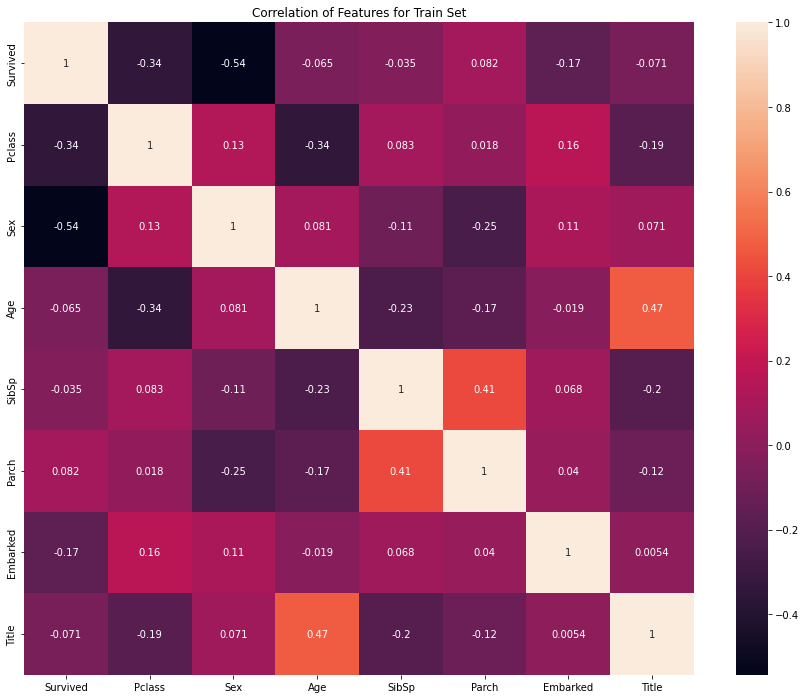

In [254]:
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(traint[0:891].corr(),vmax=1.0,  annot=True)
plt.show()

## Mise à l'échelle et séparation train et test

In [255]:
# Séparation de la cible et séparation dans train
target = traint['Survived'][0:891]
traint = traint.drop('Survived', axis =1)
# Mise à l'échelle
scaler = StandardScaler()
traint = scaler.fit_transform(traint)
train = traint[0:891]
test = traint[891:1310]

## Model et score !

In [279]:
# The model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=7,))
model.add(Dense(60,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                400       
                                                                 
 dense_10 (Dense)            (None, 60)                3060      
                                                                 
 dense_11 (Dense)            (None, 1)                 61        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [280]:

sgd = SGD(learning_rate = 0.015, momentum = 0.9)

model.compile(optimizer = sgd, 
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

# Fitting 
history =model.fit(train, target, 
               batch_size = 891, 
               epochs = 20000, verbose=0)

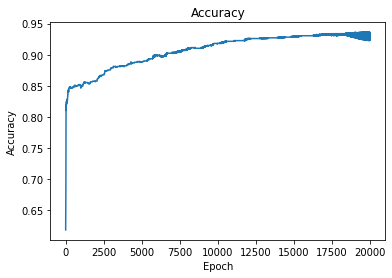

In [281]:
# accuracy
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [282]:
print('score: ' + str((pd.DataFrame(history.history)['accuracy'].max()*100)) + '%')

score: 93.6026930809021%


# Conclusion

Attention le score d'accuracy est trompeur !

Explication à venir.